Epoch: 0/5000		Training cost = 8.99e+01		Validation cost = 9.21e+01
Epoch: 100/5000		Training cost = 1.10e-01		Validation cost = 5.65e-01
Epoch: 200/5000		Training cost = 3.66e-02		Validation cost = 2.21e-01
Epoch: 300/5000		Training cost = 1.38e-02		Validation cost = 7.67e-02
Epoch: 400/5000		Training cost = 6.19e-03		Validation cost = 3.38e-02
Epoch: 500/5000		Training cost = 3.46e-03		Validation cost = 2.35e-02
Epoch: 600/5000		Training cost = 2.34e-03		Validation cost = 2.31e-02
Epoch: 700/5000		Training cost = 1.78e-03		Validation cost = 2.53e-02
Epoch: 800/5000		Training cost = 1.44e-03		Validation cost = 2.80e-02
Epoch: 900/5000		Training cost = 1.18e-03		Validation cost = 3.06e-02
Epoch: 1000/5000		Training cost = 9.82e-04		Validation cost = 3.30e-02
Epoch: 1100/5000		Training cost = 8.18e-04		Validation cost = 3.51e-02
Epoch: 1200/5000		Training cost = 6.83e-04		Validation cost = 3.71e-02
Epoch: 1300/5000		Training cost = 5.71e-04		Validation cost = 3.89e-02
Epoch: 1400/5000		

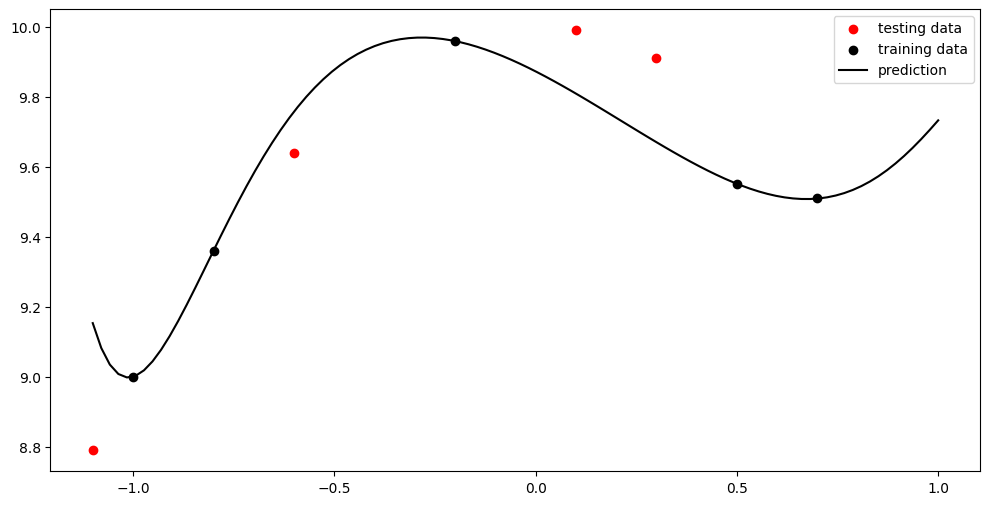

In [19]:
# Ex 5 - Higher Order regression

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)
# Criar os dados, ".seed" é um comando que cria e armazena os dados (Sendo possíveis acessar em outro momento os mesmos dados)

xTrain = np.array([-1.0, -0.8, -0.2, 0.5, 0.7])
yTrain = -(xTrain ** 2) + 10.0
yTrain[3] -= 0.2
# -= significa que a variavel antes do igual é utilizada também após o igual com -0.2
# A forma [3] significa que estou me referindo ao quarto número da sequencia
xTest = np.array([-1.1, -0.6, 0.1, 0.3])
yTest = -(xTest ** 2) + 10.0

# print(yTrain[3]) # Apenas verificando

# Model Definition

class HigherOrderRegression:
    def __init__(self, polynomialDegree, regularization=None):
        self.polynomialDegree = polynomialDegree
# .polynomialDegree é o input para que seja salvo como grau de polinômios
        self.regularization = regularization
# .regularization ajuda a manter os dados associados ao objeto em questão
        self.weights = np.zeros(polynomialDegree)
        self.bias = 0

    def forward(self, x):
        y = self.bias
        for i in range(self.polynomialDegree):
    # range(self.polynomialDegree) gera uma sequencia de números igual a -1 em relação ao grau do polinômio, por exemplo se o polynomialDegree = 4, será uma sequeência de 4 números começando do 0 (Será 0,1,2,3)
            y += self.weights[i] * x ** (i + 1)
    # [i] é a nomenclatura para um contador de loops.
        return y

    def costFunction(self, x, y):
            cost = np.mean((self.forward(x) - y) ** 2)
    # np.mean calcula a soma aritmética
            if self.regularization == None:
    # "==" significa igual à
                return cost
            else:
                return cost + self.regularization * (np.sum(self.weights ** 2) + self.bias ** 2)
    # "np.sum()" calcula a soma no array

    def gradient(self, x, y):
            gradientWeights = np.zeros(self.polynomialDegree)
            gradientBias = 2 * (self.forward(x) - y)
            for i in range(self.polynomialDegree):
                    gradientWeights[i] = np.mean(gradientBias * x ** (i + 1))
                    sumgradientBias = np.mean(gradientBias) # Arrumei aqui
            if self.regularization != None:
# "!= none" significa se for diferente de none
                for i in range(self.polynomialDegree):
                    gradientWeights[i] += 2 * self.regularization * self.weights[i]
            return gradientWeights, sumgradientBias     # Arrumei aqui

    def train(self, epochs, lr, xTrain, yTrain, xTest, yTest):
            for epoch in range(epochs):
# for epoch in range(epochs) significa que irá fazer o loop até alcançar o mesmo valor de epochs, cada epoch terá um valor diferente.
                costTrain = self.costFunction(xTrain, yTrain)
                costTest = self.costFunction(xTest, yTest)
                gradientWeights, gradientBias = self.gradient(xTrain, yTrain)
                self.weights -= lr * gradientWeights
                self.bias -= lr * gradientBias
                if epoch % 100 == 0:
# É uma forma de salvar e mostrar os resultados a cada 100 épocas
                    string = (
                        "Epoch: {}/{}\t\tTraining cost = {:.2e}\t\tValidation cost = {:.2e}"
                    )
                    print(string.format(epoch, epochs, costTrain, costTest))
# string é uma forma de criar textos dinâmicos

# Model training

polynomialDegree = 9
lr = 1e-1
epochs = 5000
regularization = 1e-2

model = HigherOrderRegression(polynomialDegree)
# é uma forma de ativar a regularização
model.train(epochs, lr, xTrain, yTrain, xTest, yTest)
# é uma forma de treina-la

# Visualize the prediction
yTrainPred = model.forward(xTrain)
yTestPred = model.forward(xTest)

x = np.linspace(-1.1, 1, 100)
yPred = model.forward(x)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(xTest, yTest, color="r", label="testing data")
ax.scatter(xTrain, yTrain, color="k", label="training data")
ax.plot(x, yPred, "k", label="prediction")
ax.legend()
plt.show()

# Vou aumentar a quantidade de epocas (Agora é de 5000) para analisar o impacto. mas já gostei do resultado